In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras import initializers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
X_train,y_train,X_test,y_test,filenames = [],[],[],[],[]

with open(f"/content/drive/MyDrive/Deep Learning Group Project/AN8008 Team 3/train_images_numpy_serialized", "rb") as file:
  X_train = pickle.load(file, encoding='latin1')

with open(f"/content/drive/MyDrive/Deep Learning Group Project/AN8008 Team 3/train_labels_numpy_serialized", "rb") as file:
  y_train = pickle.load(file, encoding='latin1')

with open("/content/drive/MyDrive/Deep Learning Group Project/AN8008 Team 3/test_images_numpy_serialized", "rb") as file:
  X_test = pickle.load(file, encoding='latin1')

with open("/content/drive/MyDrive/Deep Learning Group Project/AN8008 Team 3/test_labels_numpy_serialized", "rb") as file:
  y_test = pickle.load(file, encoding='latin1')


FileNotFoundError: ignored

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(2637, 224, 224, 3)
(2637,)
(660, 224, 224, 3)
(660,)


In [ ]:
X_train = np.array(X_train).reshape(2637, 224, 224, 3)
X_test = np.array(X_test).reshape(660, 224, 224, 3)
y_train = np.asarray(y_train).reshape((-1,1))
y_test = np.array(y_test).reshape((-1,1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [ ]:
batch_size = 32
num_classes = 2
epochs = 250
data_augmentation = True
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:], kernel_regularizer=l2(0.0001), kernel_initializer="he_normal"))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),kernel_regularizer=l2(0.0001), kernel_initializer="he_normal"))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=l2(0.0001), kernel_initializer="he_normal"))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),kernel_regularizer=l2(0.0001), kernel_initializer="he_normal"))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=l2(0.0001), kernel_initializer="he_normal"))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3),kernel_regularizer=l2(0.0001), kernel_initializer="he_normal"))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=l2(0.0001), kernel_initializer="he_normal"))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3),kernel_regularizer=l2(0.0001), kernel_initializer="he_normal"))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=l2(0.0001), kernel_initializer="he_normal"))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3),kernel_regularizer=l2(0.0001), kernel_initializer="he_normal"))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(0.0001), kernel_initializer="he_normal"))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.summary()

# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 64)      1

In [ ]:
#history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(X_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(X_test, y_test),
                                    workers=4)

Using real-time data augmentation.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/250
83/83 [==============================] - 25s 301ms/step - loss: 1.3455 - accuracy: 0.5017 - val_loss: 1.1120 - val_accuracy: 0.5455
Epoch 2/250
83/83 [==============================] - 25s 302ms/step - loss: 1.1116 - accuracy: 0.5290 - val_loss: 1.1098 - val_accuracy: 0.5455
Epoch 3/250
83/83 [==============================] - 25s 305ms/step - loss: 1.1091 - accuracy: 0.5381 - val_loss: 1.1073 - val_accuracy: 0.5455
Epoch 4/250
83/83 [==============================] - 25s 307ms/step - loss: 1.1036 - accuracy: 0.5612 - val_loss: 1.1037 - val_accuracy: 0.5455
Epoch 5/250
83/83 [==============================] - 26s 312ms/step - loss: 1.0944 - accuracy: 0.5502 - val_loss: 1.0856 - val_accuracy: 0.5833
Epoch 6/250
83/83 [==============================] - 26s 310ms/step - loss: 1.0433 - accuracy: 0.6473 - val_loss: 1.0541 - val_accuracy: 0.7409
Epoch 7/250
83/83 [======

In [ ]:
#### SAVE AND LOAD MODEL, WEIGHTS AND HISTORY

#vgg5
#vgg5_dropout
#vgg5_regularization
#vgg5_batchnormalization
#vgg6_regularization
#vgg5_augmentation
#vgg5_augmentation_400epoch
#vgg5_augmentation_initializer and batch size 32
name = "vgg5_augmentation_batch32"
model.save_weights('/content/drive/MyDrive/Deep Learning Group Project/AN8008 Team 3/trained_models_vivek/weights_'+name)
model.save('/content/drive/MyDrive/Deep Learning Group Project/AN8008 Team 3/trained_models_vivek/model_vgg5_'+name)
with open('/content/drive/MyDrive/Deep Learning Group Project/AN8008 Team 3/trained_models_vivek/history_vgg5_'+name, 'wb') as file_pi:
  pickle.dump(history.history, file_pi)

#model = models.load_model('/content/drive/MyDrive/Deep Learning/model_horizontalflip')
#model.load_weights('/content/drive/MyDrive/Deep Learning/weights_horizontalflip')
with open("/content/drive/MyDrive/Deep Learning Group Project/AN8008 Team 3/trained_models_vivek/history_vgg5_"+name, "rb") as file:
  history = pickle.load(file)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Deep Learning Group Project/AN8008 Team 3/trained_models_vivek/model_vgg5_vgg5_augmentation_batch32/assets


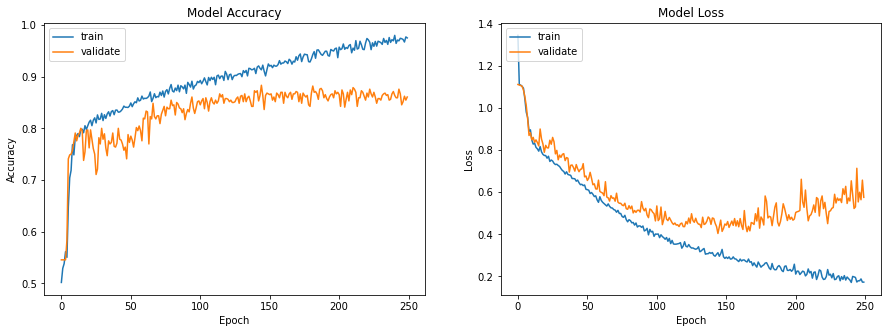

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    #axs[0].set_ylim(0.7, 0.9)
    axs[0].plot(history['accuracy']) 
    axs[0].plot(history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')

    #axs[1].set_ylim(0.1, 0.6)
    # summarize history for loss
    axs[1].plot(history['loss']) 
    axs[1].plot(history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

plotmodelhistory(history)
#plotmodelhistory(history_regularization)

In [ ]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(X_test)

21/21 [==============================] - 1s 43ms/step - loss: 0.5760 - accuracy: 0.8606
Test loss: 0.5759684443473816
Test accuracy: 0.8606060743331909
